In [3]:
import arxiv
from sentence_transformers import SentenceTransformer
import umap
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mihailtereskin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import urllib, urllib.request
from bs4 import BeautifulSoup
url = 'https://export.arxiv.org/api/query?search_query=au:robert+koenig&cat:quant-ph&start=0&max_results=59'
with urllib.request.urlopen(url) as response:
    soup = BeautifulSoup(response, "lxml")
    

In [5]:
titles = soup.find_all('title')
titles = list(map(lambda x:x.text, titles))
del titles[0]

titles[-1]

'Locking of accessible information and implications for the security of\n  quantum cryptography'

In [6]:
summaries = soup.find_all('summary')
summaries = list(map(lambda x:x.text, summaries))
summaries[-1]

"  The unconditional security of a quantum key distribution protocol is often\ndefined in terms of the accessible information, that is, the maximum mutual\ninformation between the distributed key S and the outcome of an optimal\nmeasurement on the adversary's (quantum) system. We show that, even if this\nquantity is small, certain parts of the key S might still be completely\ninsecure when S is used in applications, such as for one-time pad encryption.\nThis flaw is due to a locking property of the accessible information: one\nadditional (physical) bit of information might increase the accessible\ninformation by more than one bit.\n"

In [7]:
def retrieve_name(name):
    split_name = name.split(' ', 1)
    return True if split_name[0] == "Robert" or split_name[1] == "Koenig" else False

names = soup.find_all('name')
names = list(map(lambda x:x.text, names))
names = list(filter(retrieve_name, names))
del names[names.index('Robert Howe')]

indices = list([names.index('Alexander Koenig'), names.index('Robert A. Bridges')])
indices

[33, 15]

In [8]:
titles_to_remove = list()
summaries_to_remove = list()

for index in indices:
    titles_to_remove.append(titles[index])
    summaries_to_remove.append(summaries[index])
    
for title, summary in zip(titles_to_remove, summaries_to_remove):
    titles.remove(title)
    summaries.remove(summary)

In [73]:
search = arxiv.Search(query = "quantum", max_results=500, sort_by=arxiv.SortCriterion.SubmittedDate)

In [92]:
papers = list()
for result in search.results():
    papers.append(result.title + '.' + '\n\n' + result.summary)
    
for title, summary in zip(titles, summaries):
    papers.append(title + '.' + '\n\n' + summary)

In [93]:
len(papers)

557

In [15]:
print(papers[0])

On the degeneracies between baryons, massive neutrinos and f(R) gravity in Stage IV cosmic shear analyses.

Modelling nonlinear structure formation is essential for current and
forthcoming cosmic shear experiments. We combine the halo model reaction
formalism, implemented in the REACT code, with the COSMOPOWER machine learning
emulation platform, to develop and publicly release REACTEMU-FR, a fast and
accurate nonlinear matter power spectrum emulator for $f(R)$ gravity with
massive neutrinos. Coupled with the state-of-the-art baryon feedback emulator
BCEMU, we use REACTEMU-FR to produce Markov Chain Monte Carlo forecasts for a
cosmic shear experiment with typical Stage IV specifications. We find that the
inclusion of highly nonlinear scales (multipoles between $1500\leq \ell \leq
5000$) only mildly improves constraints on most standard cosmological
parameters (less than a factor of 2). In particular, the necessary modelling of
baryonic physics effectively damps most constraining power 

In [94]:
#tokenize text into sentences
tokenized_papers = [nltk.sent_tokenize(paper) for paper in papers]

In [77]:
tokenized_papers[0]

['On the degeneracies between baryons, massive neutrinos and f(R) gravity in Stage IV cosmic shear analyses.',
 'Modelling nonlinear structure formation is essential for current and\nforthcoming cosmic shear experiments.',
 'We combine the halo model reaction\nformalism, implemented in the REACT code, with the COSMOPOWER machine learning\nemulation platform, to develop and publicly release REACTEMU-FR, a fast and\naccurate nonlinear matter power spectrum emulator for $f(R)$ gravity with\nmassive neutrinos.',
 'Coupled with the state-of-the-art baryon feedback emulator\nBCEMU, we use REACTEMU-FR to produce Markov Chain Monte Carlo forecasts for a\ncosmic shear experiment with typical Stage IV specifications.',
 'We find that the\ninclusion of highly nonlinear scales (multipoles between $1500\\leq \\ell \\leq\n5000$) only mildly improves constraints on most standard cosmological\nparameters (less than a factor of 2).',
 'In particular, the necessary modelling of\nbaryonic physics effecti

In [98]:
# count number of sentences in each paper
num_sentences = [len(paper) for paper in tokenized_papers]

In [231]:
# remove papers with less than 2 sentences in the abstract
valid_papers = list()
for i in range(len(papers)):
    if num_sentences[i] > 6:
        valid_papers.append(papers[i])

In [232]:
len(valid_papers)

43

In [233]:
tokenized_valid_papers = [nltk.sent_tokenize(paper) for paper in valid_papers]

In [234]:
vidx = np.argmin([len(paper) for paper in tokenized_valid_papers])
print(vidx)

0


In [88]:
print(valid_papers[idx])

Investigating Loop Quantum Gravity Through Strong Gravitational Lensing Effects by Rotating Black Hole and EHT Observations.

We investigate gravitational lensing in the strong deflection regime by loop
quantum gravity (LQG)-motivated rotating black hole (LMRBH) metrics with an
additional parameter $l$ besides mass $M$ and rotation $a$. The LMRBH
spacetimes are regular everywhere, asymptotically encompassing the Kerr black
hole as a particular case and, depending on the parameters, describe black
holes with one horizon only (BH-I), black holes with an event horizon and a
Cauchy horizon (BH-II), black holes with three horizons (BH-III), or black
holes with no horizons (NH) spacetime. It turns out that as the LQG parameter
$l$ increases, the unstable photon orbit radius $x_{ps}$, the critical impact
parameter $u_{ps}$, the deflection angle $\alpha_D(\theta)$ and angular
position $\theta_{\infty}$ also increases. Meanwhile, the angular separation
$s$ decreases, and relative magnitude $r_{

In [236]:
mean = np.min([len(paper) for paper in tokenized_valid_papers])
print(mean)

11


In [237]:
embeddings = list()
model = SentenceTransformer('all-MiniLM-L6-v2')
for token_paper in tokenized_valid_papers:
    embeddings.append(model.encode(token_paper))

In [238]:
reducer = umap.UMAP(n_neighbors=6, init='random', n_components=2)
umap_embeddings=list(map(lambda x:reducer.fit_transform(x), embeddings))

In [239]:
centers = list()
for embedding in umap_embeddings:
    centers.append([np.mean(embedding[:, 0]), np.mean(embedding[:, 1])])

In [240]:
np.shape(centers)

(43, 2)

In [241]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 6).fit(centers)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(centers)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

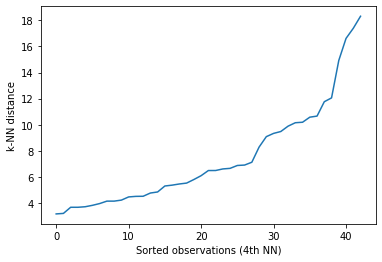

In [242]:
import matplotlib.pyplot as plt

k_dist = sort_neigh_dist[:, 5]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [243]:
%pip install kneed

Keyring is skipped due to an exception: 'keyring.backends'
Note: you may need to restart the kernel to use updated packages.


In [244]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

11.760685572138271


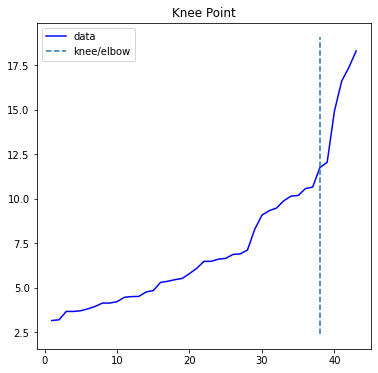

In [245]:
kneedle.plot_knee()
plt.show()

In [246]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps =3, min_samples = 2).fit(centers)

In [247]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 5, -1: 21, 1: 15, 2: 2})

In [248]:
new_centers = np.array(centers, dtype=object)
new_centers.shape

(43, 2)

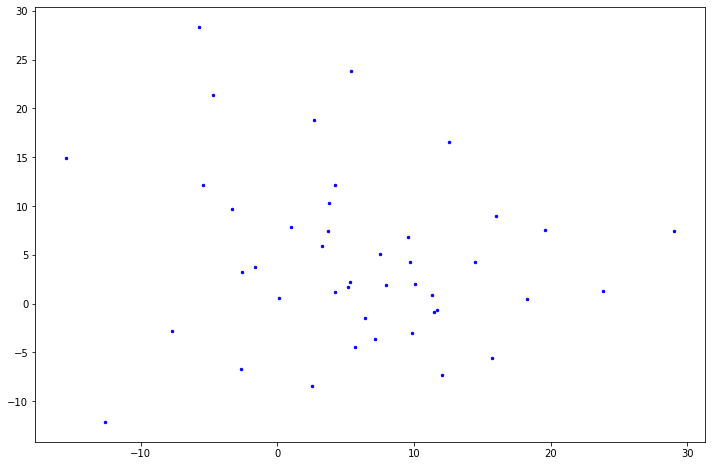

In [249]:
# plot the umap embeddings



plt.figure(figsize=(12,8))
plt.scatter(new_centers[:,0], new_centers[:,1], s=6, c='blue')

In [250]:
import pandas as pd
df = pd.DataFrame(centers)

In [253]:
%pip install -U seaborn

Keyring is skipped due to an exception: 'keyring.backends'
     |████████████████████████████████| 293 kB 3.1 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
Note: you may need to restart the kernel to use updated packages.


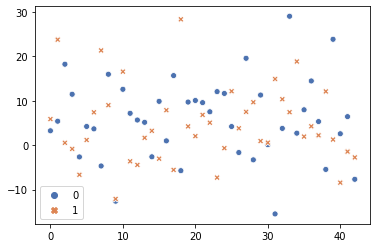

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = df, hue = clusters.labels_, legend = "full", palette = "deep")
plt.show()